##  Logistic Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Plotting of Data

In [15]:
c0 = np.zeros(100)
mean0 = [3, 1]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
c1 = np.ones(100)
mean1 = [2,4]
cov1 = np.array([[1,0],[0,1]])

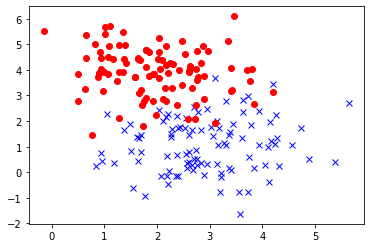

In [16]:
x0, y0 = np.random.multivariate_normal(mean0, cov0, 100).T

x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
# print(type(x0))
x0,y0

X1 = np.r_[x0,x1]
X2 = np.r_[y0,y1]
m = len(X1)
X = np.c_[X1,X2]
y = np.asarray([np.r_[c0,c1]]).T
plt.plot(x0, y0, 'bx')
plt.plot(x1, y1, 'or')
plt.show()


In [17]:
def sigmoid(z):
    
    return 1/ (1 + np.exp(-z))

In [18]:
# testing the sigmoid function
sigmoid(0)

0.5

In [19]:
def cost_gradFunction(theta, X, y):
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))

    error = (y * np.log(predictions)) + ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)

    grad = 1/m * np.dot(X.transpose(),(y - predictions))
    
    return cost[0] , grad

In [20]:
m , n = X.shape[0], X.shape[1]
X= np.append(np.ones((m,1)),X,axis=1)
X.shape

(200, 3)

In [21]:
initial_theta = np.zeros((n+1,1))
initial_theta.shape

(3, 1)

In [22]:
init_cost, grad= cost_gradFunction(initial_theta,X,y)
print("Cost of initial theta is",init_cost)
print("Gradient at initial theta (zeros):",grad)


Cost of initial theta is -0.6931471805599465
Gradient at initial theta (zeros): [[ 0.        ]
 [-0.23069451]
 [ 0.7149193 ]]


### Gradient Ascent

In [23]:
J_history =[]
lr = 0.001
new_theta = initial_theta + (lr*grad)
J_history.append(init_cost)
new_theta

array([[ 0.        ],
       [-0.00023069],
       [ 0.00071492]])

In [24]:
def gradientAscent(X,y,theta,alpha,num_iters):
      
    m=len(y)
    iterations = 0
    for i in range(num_iters):
        iterations += 1
        cost, grad = cost_gradFunction(theta,X,y)
        theta = theta + (alpha * grad)
        J_history.append(cost)
        if abs(J_history[-2] - J_history[-1]) < 0.00001:
            break
        
        
    return theta , J_history, iterations

In [25]:
theta , J_history, iterations= gradientAscent(X,y,new_theta,lr,7000)
print(iterations)

6321


In [14]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[-0.27110396]
 [-0.9939407 ]
 [ 1.13575164]]
The cost of the optimized theta: -0.19522243252064783


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

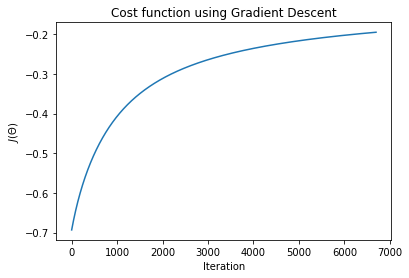

In [15]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

## Plotting the line

No handles with labels found to put in legend.


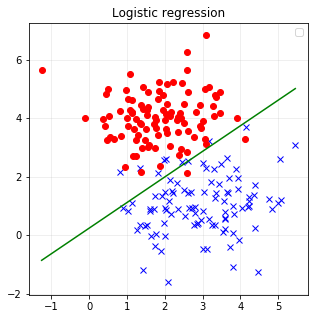

In [16]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
plt.title('Logistic regression')
plt.grid(axis='both', alpha=.25)
plt.plot(x0, y0, 'bx')
plt.plot(x1, y1, 'or')
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])]) 
y_value=-(theta[0] +theta[1]*x_value)/theta[2] 
plt.plot(x_value,y_value, "g")
plt.legend(loc=0)
plt.show()



### Prediction

In [17]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    return predictions>0

def returnClass(a):
    if(a<=0.5):
        return 'x'
    else:
        return 'o'
    
xtest1 = np.array([1,0])
xtest1 = np.r_[np.ones(1), xtest1]
print("Point(", xtest1[1],",", xtest1[2] ,") belongs to Class '%s'"   % returnClass(sigmoid(xtest1.dot(theta)[0])))

xtest2 = np.array([4,6])
xtest2 = np.r_[np.ones(1), xtest2]
print("Point(", xtest2[1],",", xtest2[2] ,") belongs to Class '%s'"   % returnClass(sigmoid(xtest2.dot(theta)[0])))

xtest3 = np.array([0,1.5])
xtest3 = np.r_[np.ones(1), xtest3]
print("Point(", xtest3[1],",", xtest3[2] ,") belongs to Class '%s'"   % returnClass(sigmoid(xtest3.dot(theta)[0])))

xtest4 = np.array([6,4])
xtest4 = np.r_[np.ones(1), xtest4]
print("Point(", xtest4[1],",", xtest4[2] ,") belongs to Class '%s'"   % returnClass(sigmoid(xtest4.dot(theta)[0])))

Point( 1.0 , 0.0 ) belongs to Class 'x'
Point( 4.0 , 6.0 ) belongs to Class 'o'
Point( 0.0 , 1.5 ) belongs to Class 'o'
Point( 6.0 , 4.0 ) belongs to Class 'x'
